## Семинар 2 "Распознавание рукописных цифр"

ФИО: 

В этом задании мы используем нейронную сеть из предыдущего семинара для распознавания рукописных цифр. Также мы исследуем как влияет выбор нелинейности и предобработка данных на качество классификации. 

Чтобы не тратить время на подготовку данных, мы прилагаем готовый код с примером использования для получения обучающей и тестовой выборок. Для запуска скрипта вам понадобится библиотека PyTorch (инструкции по установке можно найти на сайте <a href="http://pytorch.org">pytorch.org</a>)

In [1]:
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import transforms
import numpy as np
from layers import Linear, Sigmoid, NLLLoss, NeuralNetwork # Results from Seminar 1
%matplotlib inline

In [2]:
transform = transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                       ])
train_dataset = MNIST('.', train=True, download=True, transform=transform) #хз нахер тут .
test_dataset = MNIST('.', train=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [3]:
## Usage example:
for X, y in train_loader:
    X = X.view(X.shape[0], -1)
    X = X.numpy() ### Converts torch.Tensor to numpy array
    y = y.numpy()
    
    

In [4]:
X.shape

(32, 784)

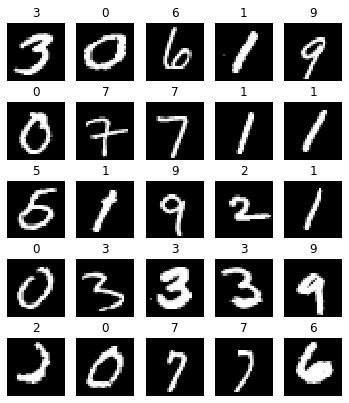

In [5]:
plt.figure(figsize=(6, 7))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X[i].reshape(28, 28), cmap=plt.cm.Greys_r)
    plt.title(y[i])
    plt.axis('off')
    

### Часть 1: MNIST
Обучите полносвязную нейронную сеть с архитектурой 784-100-100-10 и сигмоидой в качестве нелинейности. Какую точность классификации удалось получить? Нарисуйте график сходимости на обучающей и тестовой выборках. В качестве темпа обучения (learning rate) возьмите 0.01

In [6]:
class ELU:
    '''
    ELU(x) = x, x > 0; a*(e^x - 1), x <= 0
    '''
    
    def __init__(self, a=1):
        self.a = a

    def forward(self, X):
        '''
        Passes objects through this layer.
        X is np.array of size (N, d)
        '''
        self.X = X
        return X * (X > 0) + self.a * (np.exp(X) - 1) * (X <= 0)
    
    def backward(self, dLdy):
        '''
        1. Compute dLdx.
        2. Return dLdx
        '''
        X = self.X
        dydX = (X > 0) + self.a * np.exp(X) * (X <= 0)
        return dLdy*dydX
    def step(self, learning_rate):
        pass

    
        

In [7]:
from tqdm import tqdm
activate = ELU() #Функция акстивации
arch = [Linear(784, 100), activate, Linear(100, 100), activate, Linear(100, 10)] #Архитектура нейронки
losses_epoch = [] #Массив ошибок на каждой итерации
loss_graph = [] #Разреженный loss
nn = NeuralNetwork(arch) # Нейросеть 
loss = NLLLoss() # вид lossa
epoch = 10
train_accuracy_epochs = []
for j in range(epoch):
    losses = []
    accuracies = []
    for i, (X, y) in enumerate(tqdm(train_loader)):
        X = X.view(X.shape[0], -1)
        X = X.numpy() 
        y = y.numpy()

        pred = nn.forward(X) # Делаем форвард
        losses.append(loss.forward(pred, y)) # Добавляем loss
        dLdpred = loss.backward() # Считаем dLdx
        nn.backward(dLdpred) # обновляем весса
        nn.step(0.01) #скорость обучения
        accuracies.append((np.argmax(pred, 1)==y).mean())
        if (i%20 == 0):
            loss_graph.append(losses[i])
    train_accuracy_epochs.append(np.mean(accuracies))
    losses_epoch.append(np.mean(losses))
    # разреженный loss
    
    

100%|█████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:16<00:00, 114.27it/s]


In [8]:
train_accuracy_epochs[-1]

0.9547833333333333

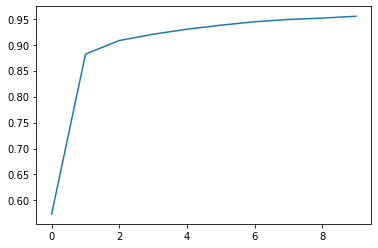

In [9]:
plt.plot(train_accuracy_epochs)

In [10]:
losses[1874]

0.034245916636827176

### Часть 2: Нелинейности

Обучите нейронную сеть с другими нелинейностями: ReLU и ELU. Сравните скорости сходимости и качество классификации с различными функциями активации.

### Часть 3: Анализ ошибок
На каких объектах сеть ошибается больше всего?

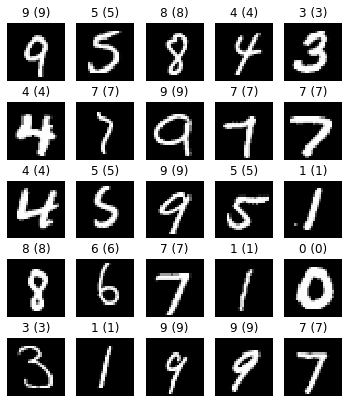

In [11]:
X, y = X[:25], y[:25]
res = nn.forward(X)
res = res.argmax(-1)


plt.figure(figsize=(6, 7))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X[i].reshape(28, 28), cmap=plt.cm.Greys_r)
    plt.title('{} ({})'.format(y[i], res[i]))
    plt.axis('off')
    pass

### HW1 (1 балл): Реализовать Tanh

### Часть 4: Аугментация (HW, 2 балла)
* Небольшие вращения (-15, 15)
* Случайные сдвиги
* Шум

Какой прирост дают эти аугментации вместе и по отдельности

In [12]:
trans = transforms.Compose([
                       transforms.RandomAffine(degrees = 15),
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                       ])

In [13]:
train_datasets_degr = MNIST('.', train = True, download = True, transform = trans )
train_loader_degr = DataLoader(train_datasets_degr, batch_size=len(train_datasets_degr))


In [14]:
transform = transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                       ])
train_dataset = MNIST('.', train=True, download=True, transform=transform) #хз нахер тут .
test_dataset = MNIST('.', train=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size = len(train_dataset))

In [15]:
tr_data = []
for X, y in tqdm(train_loader):
    X.numpy()
    y.numpy()
    for i in range(len(X)):
        tr_data.append((X[i], y[i]))
    
    

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:10<00:00, 10.28s/it]


In [16]:
for X, y in tqdm(train_loader_degr):
    X.numpy()
    y.numpy()
    for i in range(len(X)):
        tr_data.append((X[i], y[i]))


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:14<00:00, 14.20s/it]


In [17]:
train_lo = DataLoader(tr_data, batch_size = 32, shuffle = True)
test_lo = DataLoader(test_dataset, batch_size = 32, shuffle = True)

In [18]:
len(tr_data)

120000

In [19]:
from tqdm import tqdm
activate = ELU() #Функция акстивации
arch = [Linear(784, 100), activate, Linear(100, 100), activate, Linear(100, 10)] #Архитектура нейронки
losses_epoch = [] #Массив ошибок на каждой итерации
loss_graph = [] #Разреженный loss
nn = NeuralNetwork(arch) # Нейросеть 
loss = NLLLoss() # вид lossa
epoch = 10
train_accuracy_epochs = []
for j in range(epoch):
    losses = []
    accuracies = []
    for i, (X, y) in enumerate(tqdm(train_lo)):
        X = X.view(X.shape[0], -1)
        X = X.numpy() 
        y = y.numpy()

        pred = nn.forward(X) # Делаем форвард
        losses.append(loss.forward(pred, y)) # Добавляем loss
        dLdpred = loss.backward() # Считаем dLdx
        nn.backward(dLdpred) # обновляем весса
        nn.step(0.01) #скорость обучения
        accuracies.append((np.argmax(pred, 1)==y).mean())
        if (i%20 == 0):
            loss_graph.append(losses[i])
    train_accuracy_epochs.append(np.mean(accuracies))
    losses_epoch.append(np.mean(losses))
    # разреженный loss

100%|█████████████████████████████████████████████████████████████████████████████| 3750/3750 [00:06<00:00, 550.91it/s]


In [20]:
train_accuracy_epochs[-1]

0.9674083333333333

Обучите нейронную сеть с другими нелинейностями: ReLU и ELU. Сравните скорости сходимости и качество классификации с различными функциями активации.

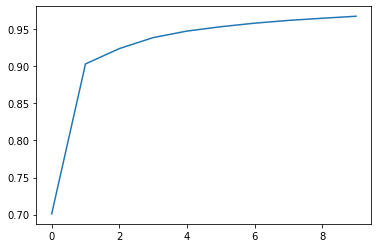

In [21]:
plt.plot(train_accuracy_epochs)

# СДВИГИ

In [51]:
trans = transforms.Compose([
                       transforms.RandomAffine(0, translate = (0.02, 0.02)),
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                       ])

In [52]:
train_datasets_degr = MNIST('.', train = True, download = True, transform = trans )
train_loader_degr = DataLoader(train_datasets_degr, batch_size=len(train_datasets_degr))


In [53]:
transform = transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                       ])
train_dataset = MNIST('.', train=True, download=True, transform=transform) #хз нахер тут .
test_dataset = MNIST('.', train=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size = len(train_dataset))

In [54]:
tr_data = []
for X, y in tqdm(train_loader):
    X.numpy()
    y.numpy()
    for i in range(len(X)):
        tr_data.append((X[i], y[i]))

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:10<00:00, 10.63s/it]


In [55]:
for X, y in tqdm(train_loader_degr):
    X.numpy()
    y.numpy()
    for i in range(len(X)):
        tr_data.append((X[i], y[i]))


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:15<00:00, 15.91s/it]


In [56]:
train_lo = DataLoader(tr_data, batch_size = 32, shuffle = True)
test_lo = DataLoader(test_dataset, batch_size = 32, shuffle = True)

In [57]:
from tqdm import tqdm
activate = ELU() #Функция акстивации
arch = [Linear(784, 100), activate, Linear(100, 100), activate, Linear(100, 10)] #Архитектура нейронки
losses_epoch = [] #Массив ошибок на каждой итерации
loss_graph = [] #Разреженный loss
nn = NeuralNetwork(arch) # Нейросеть 
loss = NLLLoss() # вид lossa
epoch = 10
train_accuracy_epochs = []
for j in range(epoch):
    losses = []
    accuracies = []
    for i, (X, y) in enumerate(tqdm(train_lo)):
        X = X.view(X.shape[0], -1)
        X = X.numpy() 
        y = y.numpy()

        pred = nn.forward(X) # Делаем форвард
        losses.append(loss.forward(pred, y)) # Добавляем loss
        dLdpred = loss.backward() # Считаем dLdx
        nn.backward(dLdpred) # обновляем весса
        nn.step(0.01) #скорость обучения
        accuracies.append((np.argmax(pred, 1)==y).mean())
        if (i%20 == 0):
            loss_graph.append(losses[i])
    train_accuracy_epochs.append(np.mean(accuracies))
    losses_epoch.append(np.mean(losses))
    # разреженный loss

100%|█████████████████████████████████████████████████████████████████████████████| 3750/3750 [00:07<00:00, 530.51it/s]


In [59]:
train_accuracy_epochs[-1]

0.971175

### Часть 5: Выводы
Опишите полученные результаты: как влияют выбор нелинейности и предобработка данных на скорость сходимости и итоговое качество?